In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. 데이터 업로드 및 탐색

In [2]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

404
404
102
102


In [3]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
data = pd.DataFrame(train_data)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


# 2. 전처리 (표준화)

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean

In [7]:
std = train_data.std(axis=0)
train_data /= std

In [8]:
test_data -= mean
test_data /= std

# 3. 모델 구성 및 컴파일

In [9]:
# 2차원 배열 (샘플 수, 특성 수)
train_data.shape

(404, 13)

In [10]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(1))

In [11]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

# 4. 모델 학습

In [13]:
history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 543.1597 - mae: 21.5067 - val_loss: 603.9852 - val_mae: 22.8800
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 562.1829 - mae: 21.7850 - val_loss: 553.6741 - val_mae: 21.8386
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 470.4774 - mae: 20.0069 - val_loss: 494.1267 - val_mae: 20.5334
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 444.0921 - mae: 19.2686 - val_loss: 418.3613 - val_mae: 18.7363
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 358.9945 - mae: 17.1016 - val_loss: 326.2164 - val_mae: 16.2621
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 261.6534 - mae: 14.4326 - val_loss: 229.3114 - val_mae: 13.0443
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 185.4417 - mae: 11.3235 - val_loss: 149.8016 - val_mae: 9.7596
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110.4145 - mae: 8.3151 - val_loss: 99.8760 - val_mae: 7.7109
Epoch 9/10
11/11 ━━━━━━━━━━

<ipython-input-15-ba8d0cb7f6c0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


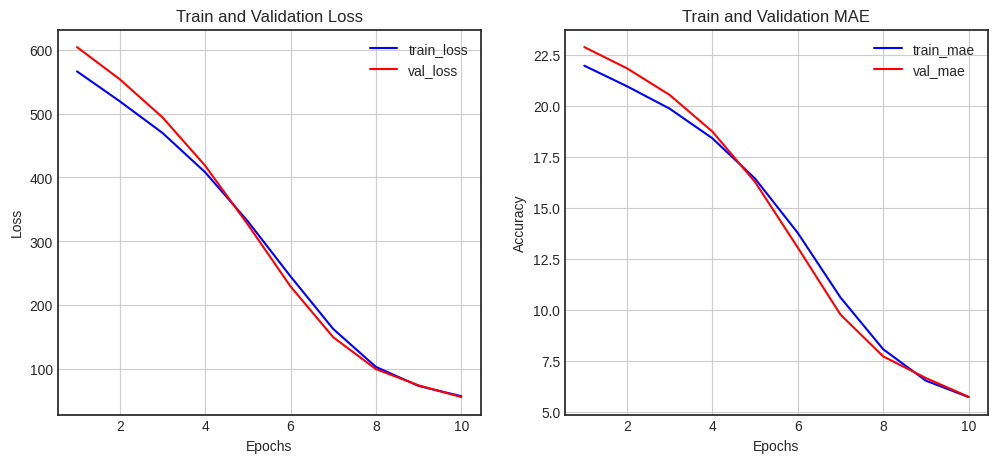

In [15]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 5. 모델 평가 및 예측

In [16]:
test_loss, test_mae = model.evaluate(test_data, test_labels)

print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.4591 - mae: 5.6027  
Test Loss (MSE): 53.19588851928711
Test MAE: 5.732236385345459
